# KNN Classification


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


E:\anaconda\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

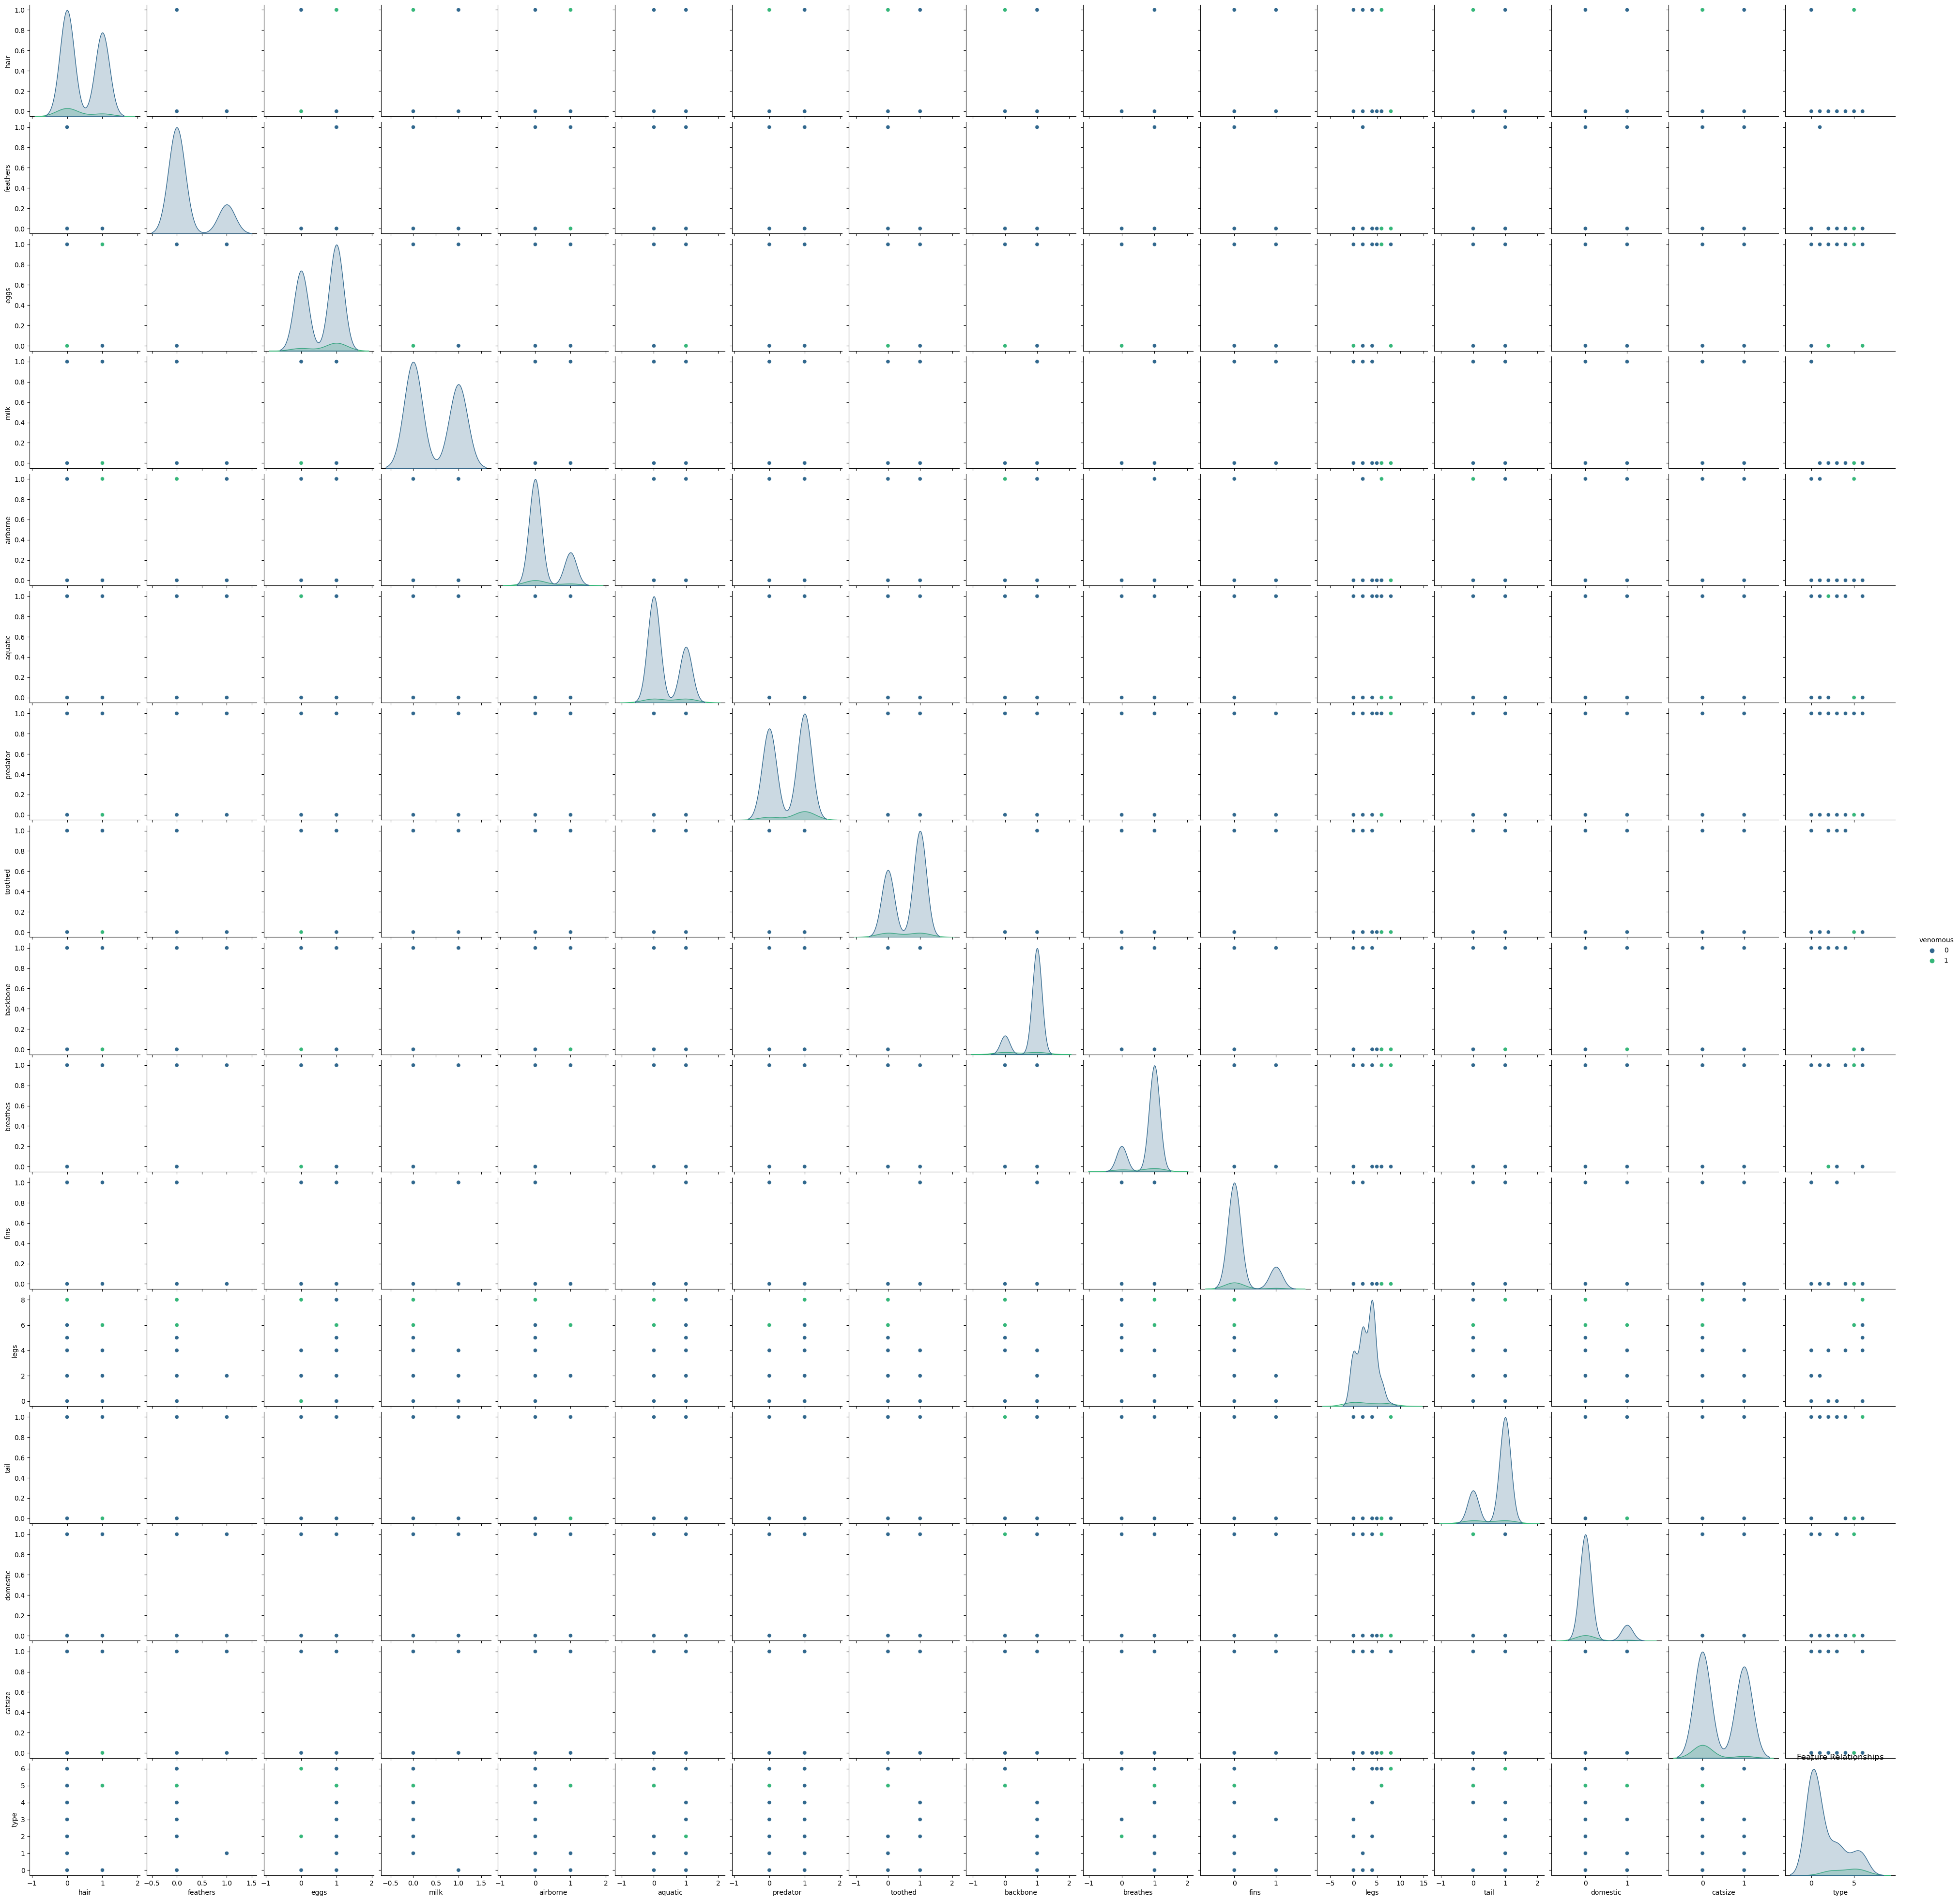

In [24]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='venomous', palette='viridis')  
plt.title('Feature Relationships')
plt.show()

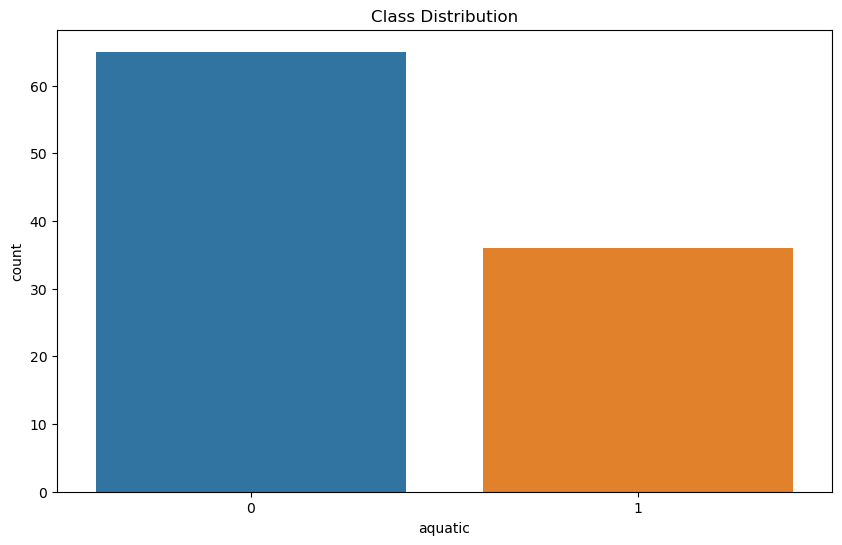

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='aquatic', data=df)
plt.title('Class Distribution')
plt.show()

In [9]:
#Encode the target variables 'Type' if it is categorical
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# 2. Preprocess data


In [30]:
# Handle missing values
print("Missing values:\n",df)
df = df.dropna()  

Missing values:
      hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type  
0           1         1    

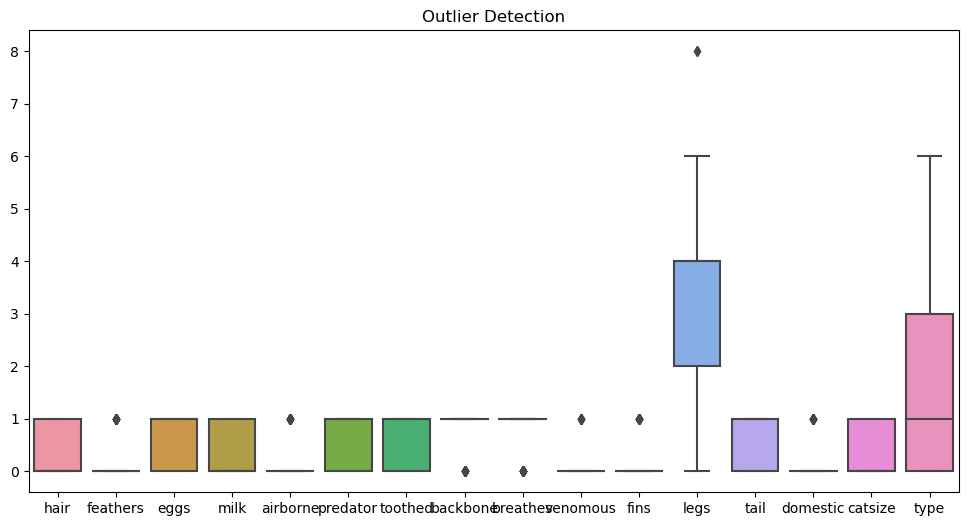

In [31]:
# Handle outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('aquatic', axis=1))
plt.title('Outlier Detection')
plt.show()

In [47]:
# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 3. Split dataset


In [48]:
X = df.drop('aquatic', axis=1)
y = df['aquatic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





# 4. Implement KNN 


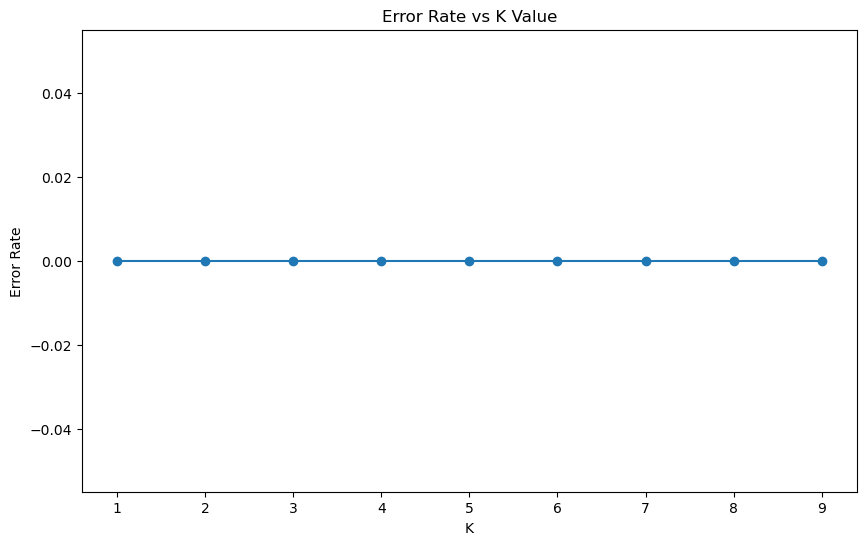

In [53]:
# Find optimal k
error_rates = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rates.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rates, marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()    

In [56]:
# Choose optimal k 
optimal_k = error_rates.index(min(error_rates[1:])) + 2  # Skip k=1

# 5. Train final model


In [57]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski', p=2)  # Euclidean distance
knn.fit(X_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# 6. Evaluate model


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Confusion Matrix:


E:\anaconda\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


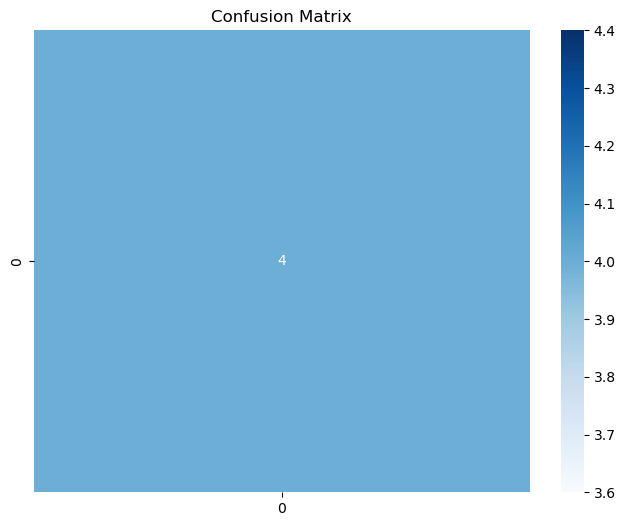

In [72]:
y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 7. Visualize decision boundaries (for 2 features)


In [74]:
# Select two most important features
feature1, feature2 = 'Feature1', 'Feature2' 

In [78]:
# Create subset of data
X_sub = X[['milk', 'eggs']].values
y_sub = y.values

In [79]:
# Scale and split
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(
    X_sub, y_sub, test_size=0.2, random_state=42
)

In [80]:
# Train KNN on subset
knn_sub = KNeighborsClassifier(n_neighbors=optimal_k)
knn_sub.fit(X_sub_train, y_sub_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


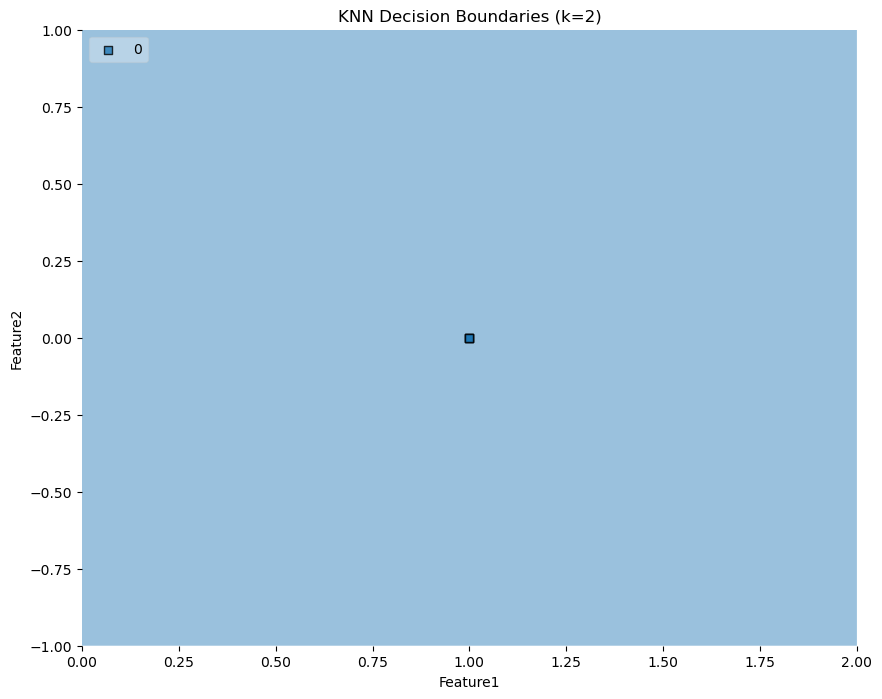

In [81]:
# Plot decision boundaries
plt.figure(figsize=(10, 8))
plot_decision_regions(X_sub_test, y_sub_test, clf=knn_sub, legend=2)
plt.title(f'KNN Decision Boundaries (k={optimal_k})')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


# Interview Questions:

1. What are the key hyperparameters in KNN?

A k-nearest neighbors is algorithm used for classification and regression. It classifies a new data point by finding the k-nearest points in the training dataset and assigns it the majority class among those neighbors.
Machine learning algorithms have hyperparameters that allow you to tailor the behavior of the algorithm to your specific dataset. Hyperparameters Tuning can improve model performance by about 20% to a range of 77% for all evaluation matrices. Hyperparameter tuning in k-nearest neighbors (KNN) is important because it allows us to optimize the performance of the model. The KNN algorithm has several hyperparameters that can significantly affect the accuracy of the model, such as the number of nearest neighbors to consider (k), the distance metric used to measure similarity, and the weighting scheme used to aggregate the labels of the nearest neighbors.

2. What distance metrics can be used in KNN?

1 Euclidean distance
2 Manhattan distance
3 Minkowski distance
4 Cosine similarity

How to choose the best distance metric

When selecting a distance metric to optimize your KNN algorithm, there is no one-size-fits-all solution. However, you can use some general guidelines to help you make the best choice. Analyzing your data and understanding the type, scale, range, and distribution of your features is essential. Experimenting with different distance metrics and comparing their results and performance on your data and problem is also key. Cross-validation and other evaluation methods can help measure the accuracy and quality of your KNN algorithm with different distance metrics. Additionally, consider the computational complexity and interpretability of the distance metrics, as well as how they affect your KNN algorithm. Lastly, try to use domain knowledge and intuition to select a distance metric that makes sense for your data and problem.